In [20]:
import pandas as pd
import matplotlib as plt

In [12]:
df=pd.read_csv('data\\steam_games.csv')
df

,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,...,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD)
0,2719580,勇者の伝説の勇者,['ぽけそう'],['ぽけそう'],"['Single-player', 'Family Sharing']","['Casual', 'Indie']",0,0,['windows'],True,...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.99
1,2719590,Light No Fire,['Hello Games'],['Hello Games'],"['Single-player', 'Multi-player', 'Co-op', 'On...","['Action', 'Adventure']",0,0,['windows'],False,...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.00
2,2719600,Lorhaven: Cursed War,['GoldenGod Games'],['GoldenGod Games'],"['Single-player', 'Multi-player', 'PvP', 'Shar...","['RPG', 'Strategy']",0,32,"['windows', 'mac']",True,...,[],9,8,1,0.0,9 user reviews,88.9,0,False,9.99
3,2719610,PUIQ: Demons,['Giammnn'],['Giammnn'],"['Single-player', 'Steam Achievements', 'Famil...","['Action', 'Casual', 'Indie', 'RPG']",0,28,['windows'],True,...,[],0,0,0,0.0,No user reviews,0.0,0,False,2.99
4,2719650,Project XSTING,['Saucy Melon'],['Saucy Melon'],"['Single-player', 'Steam Achievements', 'Steam...","['Action', 'Casual', 'Indie', 'Early Access']",0,42,['windows'],True,...,[],9,9,0,0.0,9 user reviews,100.0,0,False,7.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71424,2294300,Touchdown Pinball,['Super PowerUp Games'],['Super PowerUp Games'],"['Single-player', 'Steam Achievements', 'Full ...",['Simulation'],0,15,['windows'],True,...,[],2,2,0,0.0,2 user reviews,100.0,0,False,2.99
71425,2294250,Speed Golf Royale,['Mainframe Games'],['Mainframe Games'],"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Casual', 'Indie', 'Massively Multi...",0,0,['windows'],False,...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.00
71426,2294160,Isle of Swaps,['Fuzz Force'],['Fuzz Force'],"['Single-player', 'Steam Achievements', 'Steam...","['Indie', 'RPG', 'Strategy']",0,29,['windows'],True,...,[],72,66,6,8.0,Very Positive,91.7,0,False,14.99
71427,2294130,Goobies,['Knifes'],['Knifes'],"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Casual', 'Indie', 'RPG', 'Strategy']",0,43,['windows'],True,...,[],1442,1312,130,8.0,Very Positive,91.0,0,False,5.99


comprobar los años disponibles para asegurarme de que esta todo ok

In [13]:
años_disponibles = sorted(df['release_date'].dropna().unique())
print(años_disponibles)


['1997-06-30 00:00:00', '2001-03-15 00:00:00', '2001-12-01 00:00:00', '2003-07-01 00:00:00', '2005-04-01 00:00:00', '2005-07-14 00:00:00', '2005-11-29 00:00:00', '2006-08-30 00:00:00', '2006-10-13 00:00:00', '2006-10-25 00:00:00', '2006-11-01 00:00:00', '2006-11-07 00:00:00', '2007-01-24 00:00:00', '2007-02-02 00:00:00', '2007-03-27 00:00:00', '2007-08-03 00:00:00', '2007-09-21 00:00:00', '2007-11-07 00:00:00', '2008-03-12 00:00:00', '2008-04-01 00:00:00', '2008-05-28 00:00:00', '2008-06-17 00:00:00', '2008-06-20 00:00:00', '2008-06-24 00:00:00', '2008-07-28 00:00:00', '2008-07-31 00:00:00', '2008-09-15 00:00:00', '2008-09-17 00:00:00', '2008-09-25 00:00:00', '2008-09-29 00:00:00', '2008-09-30 00:00:00', '2008-10-03 00:00:00', '2008-10-10 00:00:00', '2008-10-20 00:00:00', '2008-10-21 00:00:00', '2008-10-22 00:00:00', '2008-11-01 00:00:00', '2008-11-03 00:00:00', '2008-11-06 00:00:00', '2008-11-13 00:00:00', '2008-11-18 00:00:00', '2008-12-10 00:00:00', '2008-12-19 00:00:00', '2009-02-0

preparo el df filtrado con los años correspondientes

In [52]:
#new column (release_year)
df['release_date'] = df['release_date'].astype(str).str.extract(r'(\d{4}-\d{2}-\d{2})')[0]
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
cl_df = df[df['is_released'] == True].copy()
cl_df['release_year']

0        2024.0
2        2024.0
3        2024.0
4        2024.0
7        2024.0
          ...  
71423    2023.0
71424    2024.0
71426    2024.0
71427    2023.0
71428    2023.0
Name: release_year, Length: 58041, dtype: float64

In [64]:
cl_df.to_csv('data\\released_games.csv')

grafico de generos publicados a lo largo de los años , filtrado por los 5 mas publicados

C:\Users\alejo\AppData\Local\Temp\ipykernel_2424\1446118264.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_por_año = genero_por_año.groupby('release_year').apply(


     release_year     genres  count
0            1997     Action      1
1            1997      Indie      1
2            1997     Racing      1
3            2001        RPG      2
4            2001     Action      1
..            ...        ...    ...
108          2025      Indie    415
109          2025     Casual    260
110          2025     Action    250
111          2025  Adventure    243
112          2025        RPG    137

[113 rows x 3 columns]


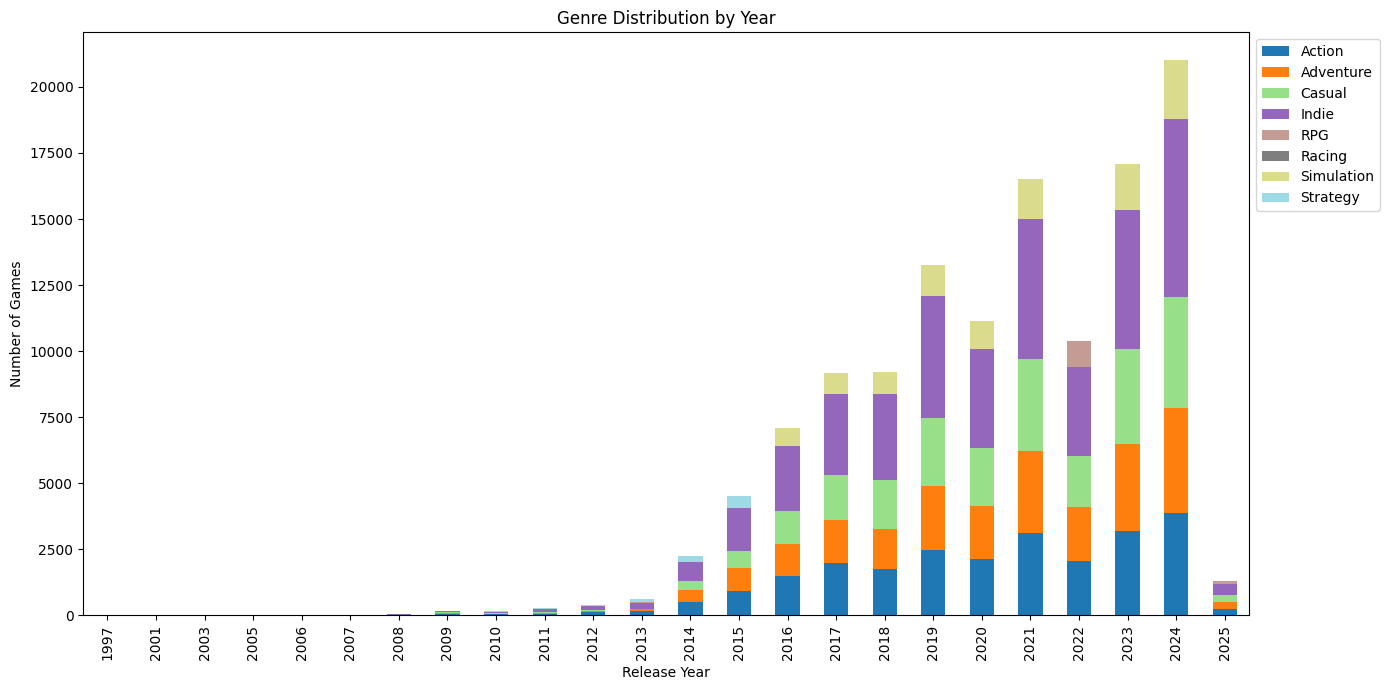

In [51]:
import ast

cl_df['genres'] = cl_df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

df_exploded = cl_df.explode('genres')

df_exploded['release_date'] = pd.to_datetime(df_exploded['release_date'], errors='coerce')
df_exploded['release_year'] = df_exploded['release_date'].dt.year

genero_por_año = df_exploded.groupby(['release_year', 'genres']).size().reset_index(name='count')

genero_por_año

top5_por_año = genero_por_año.groupby('release_year').apply(
    lambda x: x.nlargest(5, 'count')
).reset_index(drop=True)

print(top5_por_año)

pivot = top5_por_año.pivot(index='release_year', columns='genres', values='count').fillna(0)

pivot.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Genre Distribution by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Games')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

grafico de barras apiladas de los generos mejor valorados a lo largo de los años 

C:\Users\alejo\AppData\Local\Temp\ipykernel_2424\2230240269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['genres'] = df_filtrado['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
C:\Users\alejo\AppData\Local\Temp\ipykernel_2424\2230240269.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_por_positivas = genero_popular.groupby('release_year').apply(


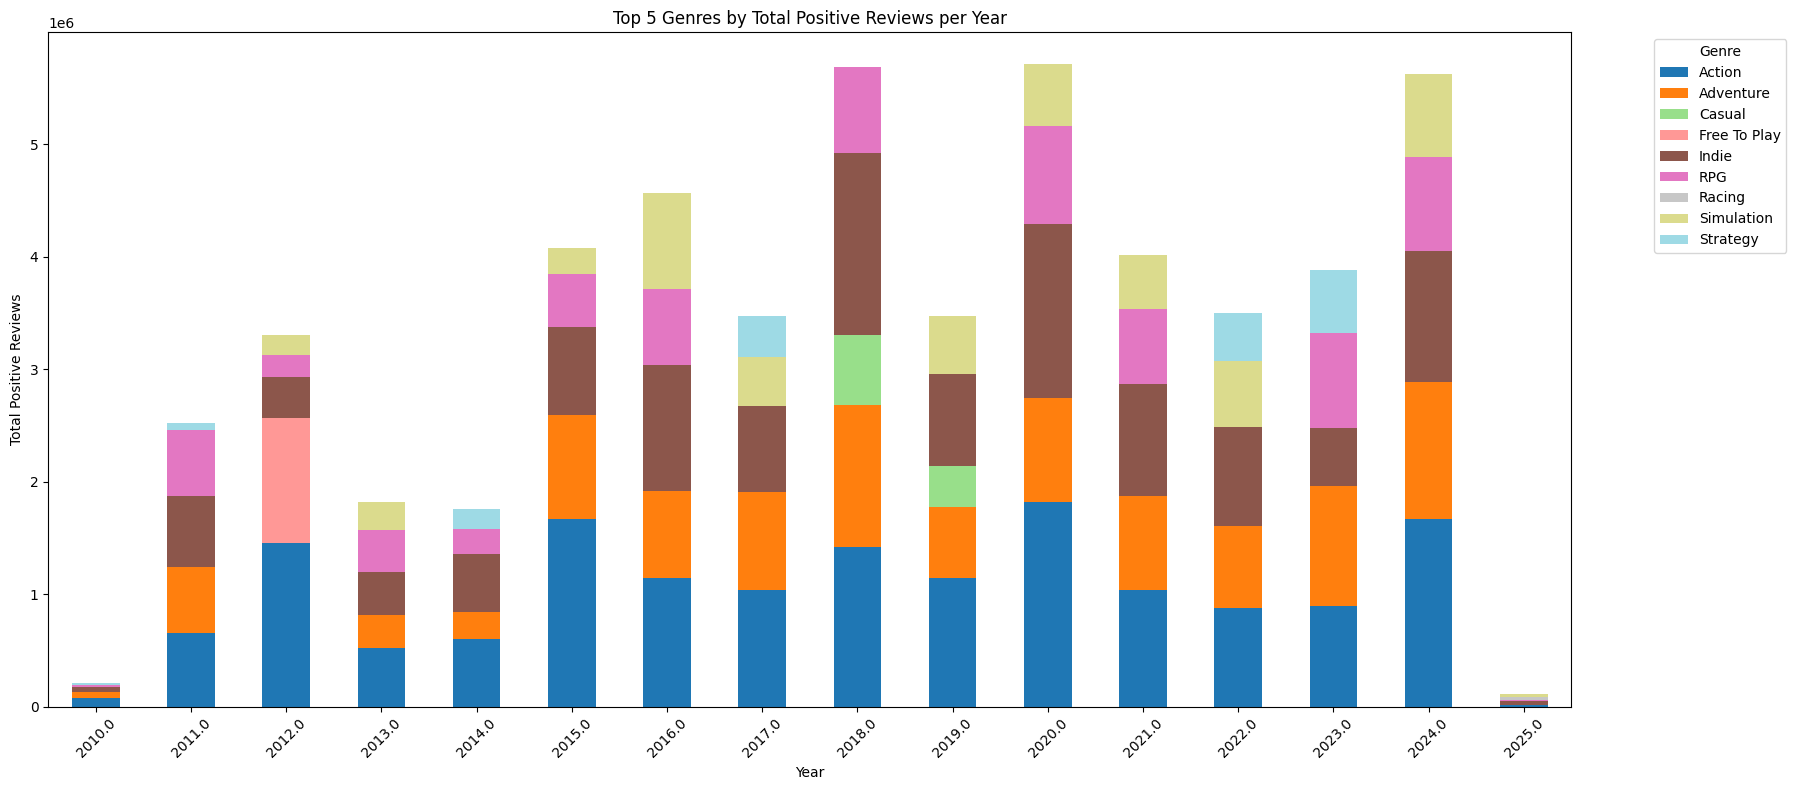

In [62]:
df_filtrado = cl_df[cl_df['total_reviews'] >= 100]

df_filtrado['genres'] = df_filtrado['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

df_exploded = df_filtrado.explode('genres')

df_exploded = df_exploded[df_exploded['release_year'] >= 2010]

genero_popular = df_exploded.groupby(['release_year', 'genres'])['total_positive'].sum().reset_index()

top5_por_positivas = genero_popular.groupby('release_year').apply(
    lambda x: x.nlargest(5, 'total_positive')
).reset_index(drop=True)

pivot_stacked = top5_por_positivas.pivot(index='release_year', columns='genres', values='total_positive').fillna(0)

import matplotlib.pyplot as plt

ax = pivot_stacked.plot(kind='bar', stacked=True, figsize=(18, 8), colormap='tab20')
plt.title('Top 5 Genres by Total Positive Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Total Positive Reviews')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [64]:
top5_por_positivas.to_csv('data\\positive_games.csv')

tabla nueva para compensar el grafico

In [63]:
tabla_resumen = top5_por_año.sort_values(by=['release_year', 'positive_percentual'], ascending=[True, False])
print(tabla_resumen[['release_year', 'genres', 'positive_percentual']])

    release_year      genres  positive_percentual
9         2010.0         RPG            95.850000
10        2010.0       Indie            95.466667
11        2010.0      Action            93.420000
12        2010.0  Simulation            92.900000
13        2010.0   Adventure            92.900000
..           ...         ...                  ...
82        2024.0         RPG            88.138462
83        2024.0    Strategy            87.388889
84        2025.0       Indie            93.100000
85        2025.0      Racing            93.100000
86        2025.0  Simulation            93.100000

[78 rows x 3 columns]


In [57]:
# Extraer el género con mayor positive_percentual por año
mejor_genero_por_año = top5_por_año.sort_values(by=['release_year', 'positive_percentual'], ascending=[True, False])
mejor_genero_por_año = mejor_genero_por_año.groupby('release_year').first().reset_index()

# Mostrar tabla
print(mejor_genero_por_año[['release_year', 'genres', 'positive_percentual']])

    release_year                genres  positive_percentual
0         2010.0                   RPG            95.850000
1         2011.0                   RPG            95.475000
2         2012.0                Casual            97.000000
3         2013.0                Casual            97.700000
4         2014.0                Racing            95.300000
5         2015.0                Casual            96.000000
6         2016.0  Animation & Modeling            99.300000
7         2017.0      Audio Production            95.900000
8         2018.0  Animation & Modeling            98.200000
9         2019.0          Early Access            93.983333
10        2020.0  Animation & Modeling            94.200000
11        2021.0          Early Access            95.183333
12        2022.0                Casual            94.591667
13        2023.0                Casual            93.100000
14        2024.0                Casual            94.881818
15        2025.0                 Indie  

In [65]:
tabla_resumen.to_csv('top_genres_by_year.csv', index=False)

  price_range  total_positive  total_reviews  positive_percentual
0        0–10         6771913        7817417            86.625966
1       10–20         8193106        9059375            90.437872
2       20–30         3803536        4237036            89.768791
3       30–40         2952706        3407954            86.641604
4       40–50         1048919        1220173            85.964777
5       50–60         2346263        2708708            86.619266
6       60–70          155822         244897            63.627566
7       70–80            9585          12379            77.429518
8         80+            1283           1752            73.230594


C:\Users\alejo\AppData\Local\Temp\ipykernel_2424\391213764.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_precio = df_filtrado.groupby('price_range').agg(


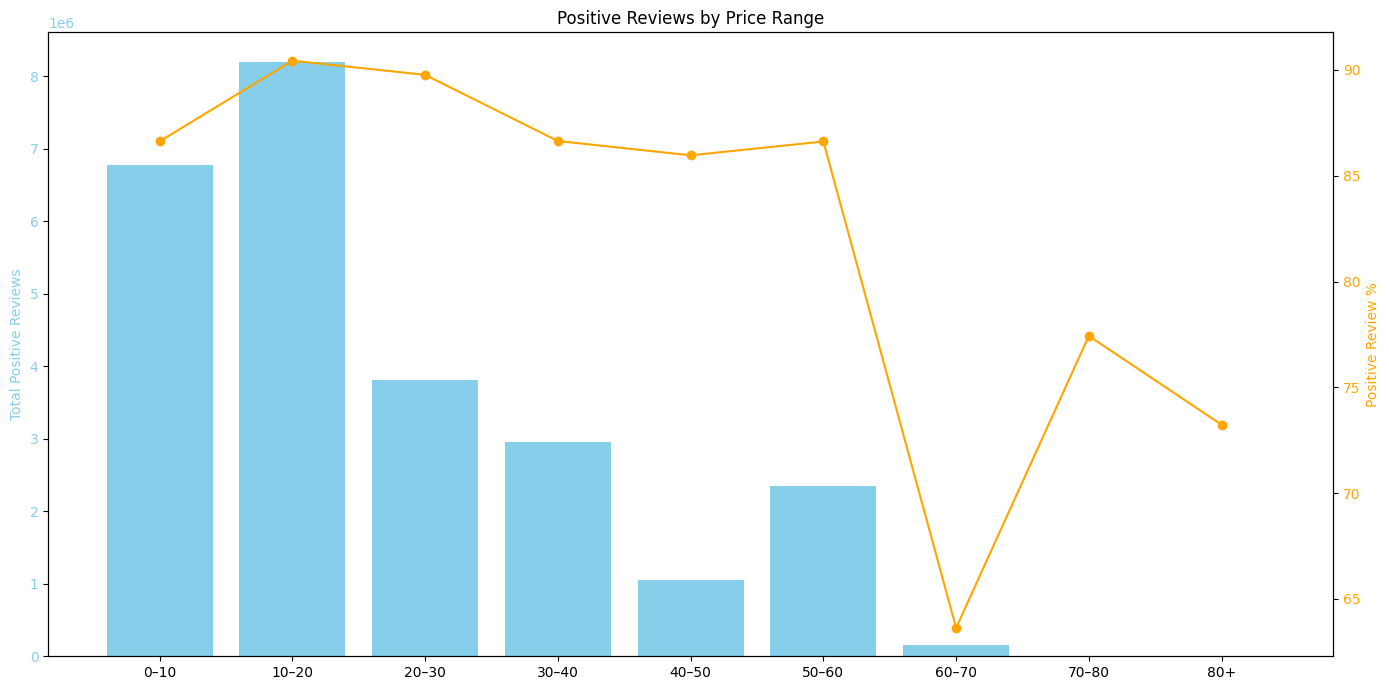

In [72]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 1000]
labels = ['0–10', '10–20', '20–30', '30–40', '40–50', '50–60', '60–70', '70–80', '80+']
df['price_range'] = pd.cut(df['price_initial (USD)'], bins=bins, labels=labels, right=False)

df_filtrado = df[df['total_reviews'] >= 100]

grupo_precio = df_filtrado.groupby('price_range').agg(
    total_positive=('total_positive', 'sum'),
    total_reviews=('total_reviews', 'sum')
).reset_index()

grupo_precio['positive_percentual'] = (grupo_precio['total_positive'] / grupo_precio['total_reviews']) * 100

print(grupo_precio)

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 7))

# Barra de total_positive
ax1.bar(grupo_precio['price_range'], grupo_precio['total_positive'], color='skyblue', label='Total Positive Reviews')
ax1.set_ylabel('Total Positive Reviews', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Línea de porcentaje de positividad
ax2 = ax1.twinx()
ax2.plot(grupo_precio['price_range'], grupo_precio['positive_percentual'], color='orange', marker='o', label='Positive %')
ax2.set_ylabel('Positive Review %', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Positive Reviews by Price Range')
fig.tight_layout()
plt.show()

C:\Users\alejo\AppData\Local\Temp\ipykernel_2424\1174892181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['price_range'] = pd.cut(df_filtrado['price_initial (USD)'], bins=bins, labels=labels, right=False)
C:\Users\alejo\AppData\Local\Temp\ipykernel_2424\1174892181.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo = df_comparativo.groupby(['release_year', 'price_range']).agg(


     release_year price_range  total_positive  avg_positive_percentual
1          2008.0       11–20           41531                86.550000
7          2009.0       11–20           42949                95.600000
13         2010.0       11–20           81268                93.928571
19         2011.0       11–20           57582                85.733333
25         2012.0       11–20          352467                92.760000
28         2012.0       41–60            9282                84.700000
31         2013.0       11–20          330612                92.975000
34         2013.0       41–60           24721                84.800000
37         2014.0       11–20          310049                90.976190
40         2014.0       41–60            6510                57.200000
43         2015.0       11–20          870664                88.854545
46         2015.0       41–60          102787                84.800000
49         2016.0       11–20         1144843                90.367647
52    

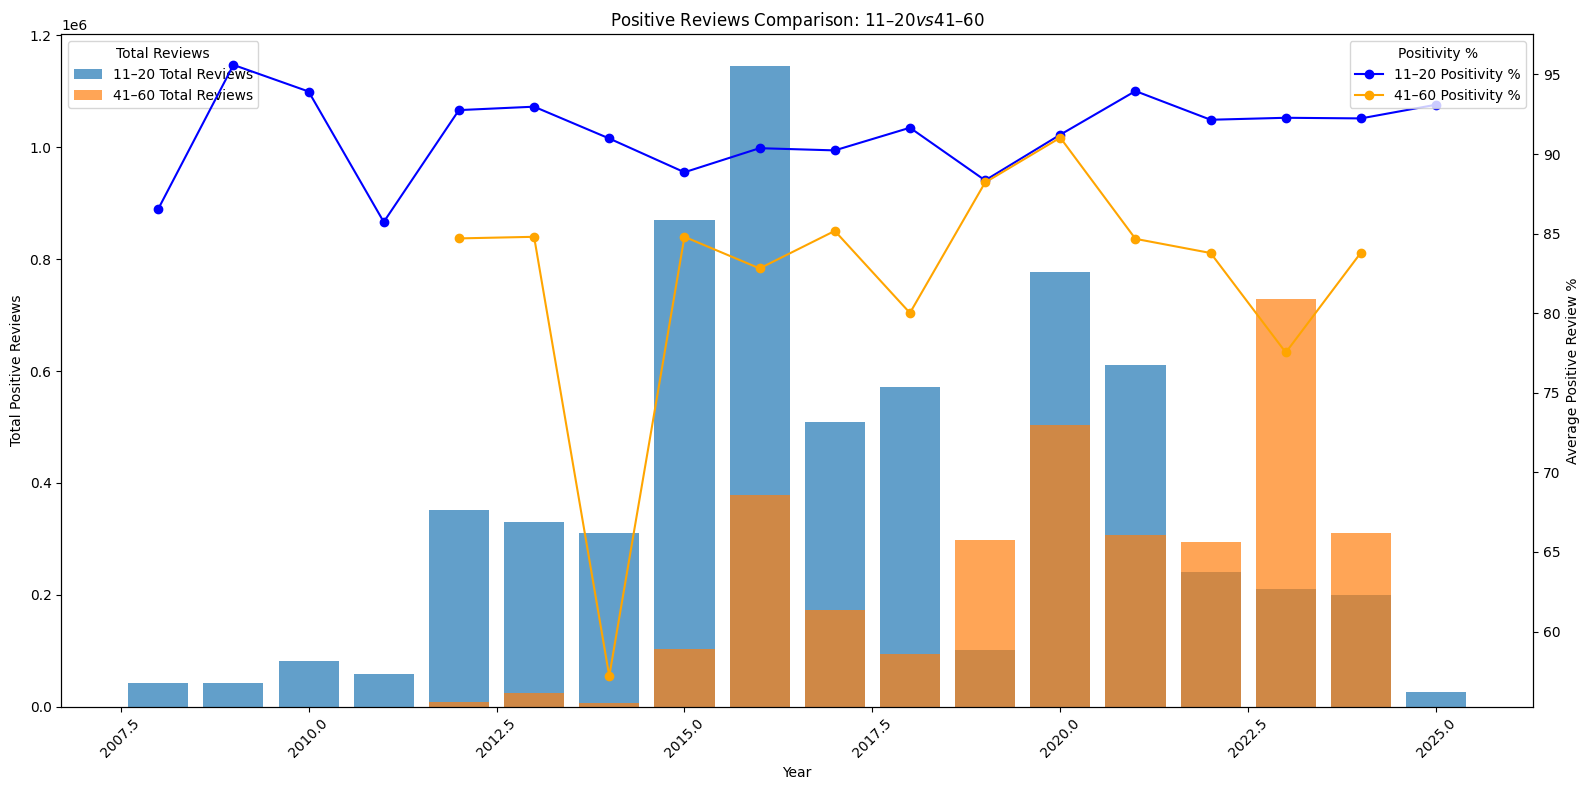

In [95]:
df_filtrado = df[df['total_reviews'] >= 5000]

bins = [0, 10, 20, 30, 40, 60, 1000]
labels = ['0–10', '11–20', '21–30', '31–40', '41–60', '60+']
df_filtrado['price_range'] = pd.cut(df_filtrado['price_initial (USD)'], bins=bins, labels=labels, right=False)

df_comparativo = df_filtrado[df_filtrado['price_range'].isin(['11–20', '41–60'])]

grupo = df_comparativo.groupby(['release_year', 'price_range']).agg(
    total_positive=('total_positive', 'sum'),
    avg_positive_percentual=('positive_percentual', 'mean')
).reset_index() 

grupo = grupo.dropna(subset=['avg_positive_percentual'])

grupo_filtrado = grupo[grupo['price_range'].isin(['11–20', '41–60'])]

print(grupo_filtrado)

pivot_columnas = grupo_filtrado.pivot(index='release_year', columns='price_range', values='total_positive').fillna(0)
pivot_linea = grupo_filtrado.pivot(index='release_year', columns='price_range', values='avg_positive_percentual').fillna(0)

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(16, 8))

# Columnas agrupadas manualmente
for rango, color in zip(['11–20', '41–60'], ['skyblue', 'gray']):
    subset = grupo_filtrado[grupo_filtrado['price_range'] == rango]
    ax1.bar(subset['release_year'], subset['total_positive'], label=f'{rango} Total Reviews', alpha=0.7)

ax1.set_ylabel('Total Positive Reviews')
ax1.set_xlabel('Year')
ax1.set_title('Positive Reviews Comparison: $11–20 vs $41–60')
plt.xticks(rotation=45)

# Línea de positividad
ax2 = ax1.twinx()
for rango, color in zip(['11–20', '41–60'], ['blue', 'orange']):
    subset = grupo_filtrado[grupo_filtrado['price_range'] == rango]
    ax2.plot(subset['release_year'], subset['avg_positive_percentual'], marker='o', label=f'{rango} Positivity %', color=color)

ax2.set_ylabel('Average Positive Review %')
ax2.legend(title='Positivity %', loc='upper right')
ax1.legend(title='Total Reviews', loc='upper left')

plt.tight_layout()
plt.show()